<a href="https://colab.research.google.com/github/CIC-Research/Data-Science-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
### CIC Data Science Project
By: Neidy Malaga



#### Step 1: Beginning Setup

For our project, we will focus on the 'Walmart.csv' dataset. We will cluster and classify at least two topics. These two topics are Purchase Amount over Product Category and Purchase over Gender. The purpose of the project is to see if the classification model can find any patterns between how Purchase Amounts are grouped to certain Product Categories and how Gender affects Purchase Amount.

We start by using pandas to read our data from an Excel file and display it to prove it was read well. We then clean up the data and separate them into two datasets for convenience.

Credit: https://www.statology.org/pandas-plot-value-counts/

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
#try/catch for pd.read_csv
try:
    Walmart_Data = pd.read_csv('walmart.csv')
    #changing data types to conserve memory, implementing binary
    Walmart_Data['Purchase'] = Walmart_Data['Purchase'].astype('uint16')
    Walmart_Data['Product_Category'] = Walmart_Data['Product_Category'].astype('uint8')
    Walmart_Data['Gender'] = Walmart_Data['Gender'].map({'M': 0, 'F': 1})
  
    #seperating into individual sets 
    Purchase_PC_Data= Walmart_Data[['Purchase','Product_Category']]
    Purchase_Gender_Data = Walmart_Data[['Purchase','Gender']]
    
    #checking to see if datasets have read csv file successfully
    print(f'First set is empty: {Purchase_PC_Data.empty}')
    print(f'Second set is empty: {Purchase_Gender_Data.empty}')
except FileNotFoundError:
    print('File not found')
except pd.errors.EmptyDataError:
    print('Empty Data')
except pd.errors.DataError:
    print('Data Error')
except pd.errors.ParserError:
    print('Parser Error')


First set is empty: False
Second set is empty: False


In [4]:
Walmart_Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,7969


<Axes: xlabel='Gender'>

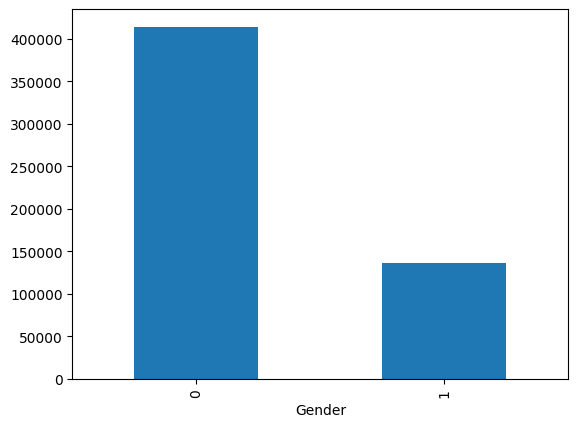

In [13]:
Walmart_Data['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Product_Category'>

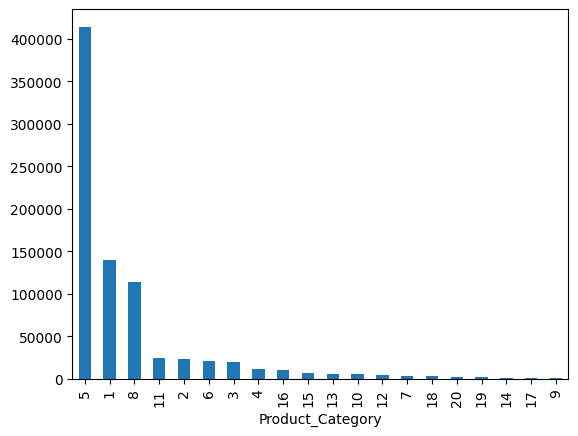

In [12]:
Walmart_Data['Product_Category'].value_counts().plot(kind='bar')

#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are measuring Purchase Amount per Product Category, Purchase Amount will be the explanatory value (x-val) and Product Category will be the response value (y-val). In addition, Purchase per Gender will be denoted as the explanatory value per the response value. 

The following code block will show the scatterplot. Based on the scatterplot, we can see that the first graph has a few outliers to the right and the information is spread out. We can get an idea on how much clusters can cover the data. For the second graph, the data points are evenly distributed throughout the graph, but Gender's classes are imbalanced.

We will use this information to confirm our methods in Step 3 when we perform a cluster.


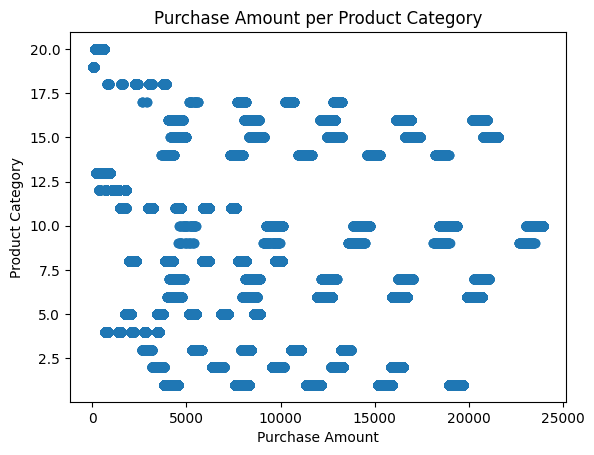

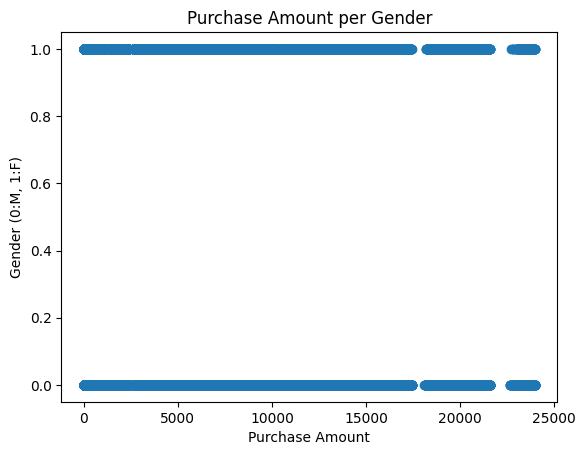

In [4]:
#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(Purchase_PC_Data['Purchase'], Purchase_PC_Data['Product_Category'])
plt.xlabel('Purchase Amount')
plt.ylabel('Product Category')
plt.title('Purchase Amount per Product Category')
plt.show()

plt.scatter(Purchase_Gender_Data['Purchase'], Purchase_Gender_Data['Gender'])
plt.xlabel('Purchase Amount')
plt.ylabel('Gender (0:M, 1:F)')
plt.title('Purchase Amount per Gender')
plt.show()

#### Step 3: Clustering Data
##### Elbow Method
In order to cluster data, we will use K-Means++ algorithm and Elbow Method. To start, we test the cost of the Kmodes algorithm over 1-20 and 1-5 cluster trials. We then graph it as the Elbow Method, which will show us how many centroids we need. You can see that the Elbow Method shows the optimal centroid amount by illustrating the most bent section. In the first graphs, the most linear section resides at the number 15. For the second graph, the Elbow Method indicates that we should also use 2 clusters.

##### Kmodes
After, we employ the use of the Kmodes algorithm to show the clusters of categorical and binary data. The algorithm begins by making grouping random categorical datas into clusters based on the mode. It will then check if the clusters are correct by checking if the real categorical data is similarly grouped. It will then calculate the dissimilarities if they are not grouped, and then update the clusters until it finds the least total cost.

Credit: https://www.geeksforgeeks.org/k-mode-clustering-in-python/#
https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/#:~:text=KModes%20is%20a%20clustering%20algorithm%20used%20in%20data,values%20within%20each%20cluster%20to%20determine%20its%20centroid.

Best run was number 1
Best run was number 1
Best run was number 3
Best run was number 1
Best run was number 3
Best run was number 1
Best run was number 1
Best run was number 1
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 2
Best run was number 3
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 2
Best run was number 3
Best run was number 1
Best run was number 2


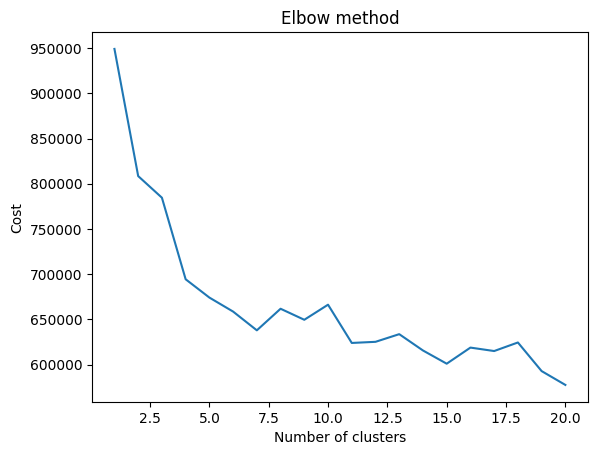

In [8]:
cost = []

for index in range(1,21):
    kmode = KModes(n_clusters=index, init='random',n_init=3, verbose=1, n_jobs=-1)
    kmode.fit_predict(Purchase_PC_Data)
    cost.append(kmode.cost_)


plt.plot(range(1,21), cost)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

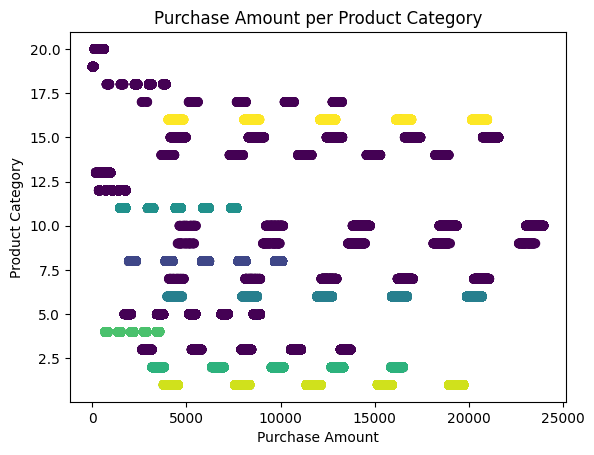

In [10]:
kmode = KModes(n_clusters=15, init='random', n_init=5)
kmode.fit_predict(Purchase_PC_Data)

#displays Clustering graph
plt.scatter(Purchase_PC_Data['Purchase'], Purchase_PC_Data['Product_Category'], c=kmode.labels_)
plt.xlabel('Purchase Amount')
plt.ylabel('Product Category')
plt.title('Purchase Amount per Product Category')
plt.show()

Best run was number 1
Best run was number 2
Best run was number 3
Best run was number 3
Best run was number 3


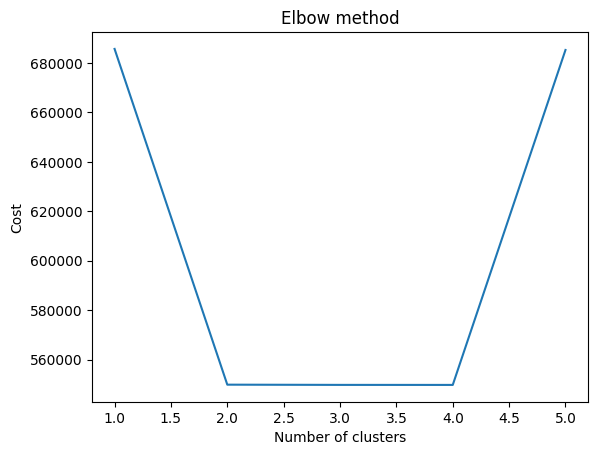

In [11]:
#Elbow Method
cost.clear()

for index in range(1,6):
    kmode = KModes(n_clusters=index, init='random',n_init=3, verbose=1, n_jobs=-1)
    kmode.fit_predict(Purchase_Gender_Data)
    cost.append(kmode.cost_)

plt.plot(range(1,6), cost)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

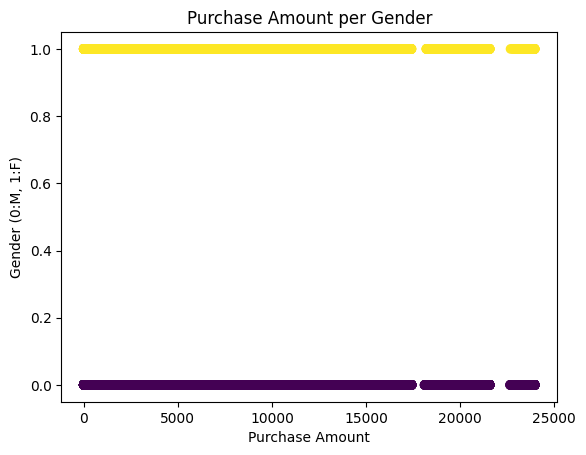

In [12]:
kmode = KModes(n_clusters=2, init='random',n_init=5)
kmode.fit_predict(Purchase_Gender_Data)

plt.scatter(Purchase_Gender_Data['Purchase'], Purchase_Gender_Data['Gender'], c=kmode.labels_)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender (0:M, 1:F)')
plt.title('Purchase Amount per Gender')
plt.show()

#### Step 3: Classification
##### Decision Trees
As the Purchase over the Product Category contains one categorical and discrete column, we will use Decision Trees. The data is split into testing and training data in order to prevent overfitting, underfitting, and to get an accuracy score. The model will begin to fit its training data, in which it will group the information into binary trees. By doing this, it will be able to use the patterns in its binary trees to predict new data.

##### Accuracy Score
We then use the accuracy score to check the accuracy of our model when training/testing. We use the training and testing data to predict its accuracy. It is able to do this by making a confusion matrix and using set equations to calculate both accuracies. 

##### Learning Curve
A learning curve is a graph meant to show how the model will react to an increase in training data, as it offers insight on underfitting and overfitting problems. In order to further check the accuracy of our model, we will use a learning curve. This learning curve is created by using cross validation, which collects testing and training accuracy scores. The cross validation will split several parts of the data into testing and training data in order to test the accuracy of the model. The learning curve is then displayed and measured by accuracy. In order to ensure our model is not overfitting or underfitting, we need to make sure there is not a huge gap between the curves, and that training data will be above the testing data, and that they converge at the end.

##### Additional Information
Since some classes in our Product Category are a bit uneven, we use class_weight.

Credits: https://stats.stackexchange.com/questions/354709/sklearn-metrics-accuracy-score-vs-logisticregression-score
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html
https://www.codespeedy.com/diagnose-overfitting-and-underfitting-of-lstm-models-in-python/
https://www.researchgate.net/figure/An-example-of-an-overfitted-accuracy-loss-curve-while-training-DenseNet201-without-data_fig3_343584572

In [7]:
#explanatory/response values, (drops Product Category)
x = Purchase_PC_Data.drop('Product_Category', axis=1)
y = Purchase_PC_Data['Product_Category']

# splits data into 80% training and 20% testing
# starts the Decision Tree Model and fits the training data to the model
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)
#shows training/testing accuracy using the accuracy_score
print(f'Training Accuracy : {accuracy_score(Y_train, dt.predict(X_train))*100}')
print(f'Validation Accuracy : {accuracy_score(Y_test, Y_pred)*100}')

print(classification_report(Y_test, Y_pred))

Training Accuracy : 74.47381457730188
Validation Accuracy : 72.76619339356809
              precision    recall  f1-score   support

           1       0.98      0.68      0.81     28022
           2       0.62      0.45      0.52      4851
           3       0.69      0.68      0.69      3986
           4       0.54      0.88      0.67      2422
           5       0.97      0.91      0.94     30353
           6       0.54      0.44      0.48      4020
           7       0.12      0.35      0.17       738
           8       0.81      0.67      0.73     22700
           9       0.04      0.24      0.06       100
          10       0.31      0.76      0.44      1050
          11       0.46      0.77      0.58      4821
          12       0.52      0.92      0.67       806
          13       0.92      0.96      0.94      1122
          14       0.06      0.58      0.11       312
          15       0.33      0.47      0.39      1242
          16       0.22      0.25      0.23      1921
   

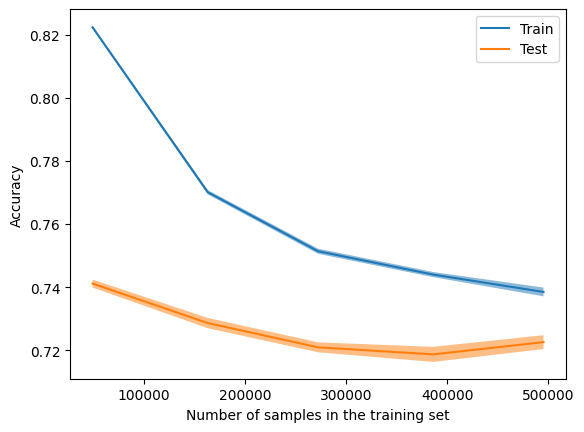

In [31]:
train_sizes, train_scores, test_scores = learning_curve(estimator=dt, X= x, y= y, cv = 10, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.], n_jobs=-1)
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()

In [32]:
#chosing Purchases to see if model can classify Product Categories correctly
data_ex = pd.DataFrame({
    'Purchase': np.array(range(100, 25100, 100))
})

new_predictions = dt.predict(data_ex)

for i in range(0,data_ex.shape[0]):
    print(f'Chosen Purchase: {data_ex.iloc[i, 0]} \tPredicted Product Category: {new_predictions[i]}')


Chosen Purchase: 100 	Predicted Product Category: 20
Chosen Purchase: 200 	Predicted Product Category: 13
Chosen Purchase: 300 	Predicted Product Category: 20
Chosen Purchase: 400 	Predicted Product Category: 13
Chosen Purchase: 500 	Predicted Product Category: 20
Chosen Purchase: 600 	Predicted Product Category: 20
Chosen Purchase: 700 	Predicted Product Category: 4
Chosen Purchase: 800 	Predicted Product Category: 4
Chosen Purchase: 900 	Predicted Product Category: 18
Chosen Purchase: 1000 	Predicted Product Category: 12
Chosen Purchase: 1100 	Predicted Product Category: 12
Chosen Purchase: 1200 	Predicted Product Category: 12
Chosen Purchase: 1300 	Predicted Product Category: 12
Chosen Purchase: 1400 	Predicted Product Category: 12
Chosen Purchase: 1500 	Predicted Product Category: 4
Chosen Purchase: 1600 	Predicted Product Category: 11
Chosen Purchase: 1700 	Predicted Product Category: 11
Chosen Purchase: 1800 	Predicted Product Category: 5
Chosen Purchase: 1900 	Predicted Product 

##### Logistic Regression
Logistic Regression is a classification model that uses the sigmoid function to predict where new data points are based on the model's training data. Since we are comparing Product Category over Gender, we are actually comparing categorical values over binary values. Thus, we will use Binomial Logistic Regression to deal with the binary values. 

##### Additional Information
It is important to denote that there is a class imbalance for Gender due to the low sample amount of Female participants. This class imbalance was not necessary to fix for scatter plots or clustering, but will be fixed for the Logistic Regression. We will accomplish this by adding more weight to the Female (1) side when training the model. This is accomplished through the use of class weight.

Credit: https://www.geeksforgeeks.org/understanding-logistic-regression/
https://geekpython.in/how-to-use-sklearn-standardscaler

In [3]:
#explanatory/response values
x =  Purchase_Gender_Data.drop('Gender', axis=1)
y = Purchase_Gender_Data['Gender']

#splits data into 80% training and 20% testing
#starts the Logistic Regression model and fits the training data to the model
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

lr = LogisticRegression(class_weight= 'balanced', solver='saga', max_iter=5000)
lr.fit(X_train, Y_train)

print(f'Training Accuracy : {accuracy_score(Y_train, lr.predict(X_train))*100}%')
print(f'Validation Accuracy : {accuracy_score(Y_test, lr.predict(X_test))*100}%')

Training Accuracy : 75.16236643684638%
Validation Accuracy : 75.26587525224062%


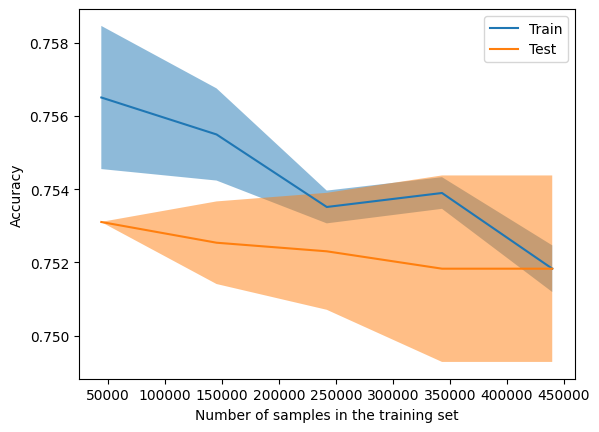

In [5]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X= x, y= y, cv = 5, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()

In [40]:
#chosen Product Category to see if model can classify Gender correctly
data_ex = pd.DataFrame({
    'Purchase': np.array(range(100, 25100, 100))
})

new_predictions = lr.predict(data_ex)

for i in range(0,data_ex.shape[0]):
    print(f'Chosen Purchase Ex: {data_ex.iloc[i, 0]} \tPredicted Gender: {new_predictions[i]}')

Chosen Purchase Ex: 100 	Predicted Gender: 1
Chosen Purchase Ex: 200 	Predicted Gender: 1
Chosen Purchase Ex: 300 	Predicted Gender: 1
Chosen Purchase Ex: 400 	Predicted Gender: 0
Chosen Purchase Ex: 500 	Predicted Gender: 0
Chosen Purchase Ex: 600 	Predicted Gender: 0
Chosen Purchase Ex: 700 	Predicted Gender: 0
Chosen Purchase Ex: 800 	Predicted Gender: 0
Chosen Purchase Ex: 900 	Predicted Gender: 0
Chosen Purchase Ex: 1000 	Predicted Gender: 0
Chosen Purchase Ex: 1100 	Predicted Gender: 0
Chosen Purchase Ex: 1200 	Predicted Gender: 0
Chosen Purchase Ex: 1300 	Predicted Gender: 0
Chosen Purchase Ex: 1400 	Predicted Gender: 0
Chosen Purchase Ex: 1500 	Predicted Gender: 0
Chosen Purchase Ex: 1600 	Predicted Gender: 0
Chosen Purchase Ex: 1700 	Predicted Gender: 0
Chosen Purchase Ex: 1800 	Predicted Gender: 0
Chosen Purchase Ex: 1900 	Predicted Gender: 0
Chosen Purchase Ex: 2000 	Predicted Gender: 0
Chosen Purchase Ex: 2100 	Predicted Gender: 0
Chosen Purchase Ex: 2200 	Predicted Gender:

#### Step 4: Neural Networks
Credit: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
https://www.youtube.com/watch?v=_VTtrSDHPwU
https://stackoverflow.com/questions/51618745/how-do-i-get-the-predicted-labels-from-a-model-predict-function-from-keras


In [3]:
Walmart_Data['Stay_In_Current_City_Years'] = Walmart_Data['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})
Walmart_Data['Age'] = Walmart_Data['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55':5, '55+':6})
Walmart_Data['City_Category'] = Walmart_Data['City_Category'].map({'A': 0, 'B': 1, 'C': 2})

x = Walmart_Data[['Stay_In_Current_City_Years', 'Age', 'City_Category', 'Marital_Status', 'Product_Category', 'Occupation']]
y = Walmart_Data['Gender']

sm = SMOTE()
x, y = sm.fit_resample(x, y)

x = pd.get_dummies(x,columns= ['Stay_In_Current_City_Years', 'Age', 'City_Category', 'Marital_Status', 'Product_Category', 'Occupation'], dtype=int)
x.head()

,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_0,Age_1,Age_2,Age_3,Age_4,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size = 60, validation_data=(X_test, Y_test))


test_loss, test_accuracy = model.evaluate(X_test, Y_test)
val_loss, val_accuracy = model.evaluate(X_train, Y_train)

print(f'Test Accuracy: {test_accuracy*100}% \nTest Loss: {test_loss*100}%')
print(f'Validation Accuracy: {val_accuracy*100}% \nValidation Loss: {val_loss*100}%')

Epoch 1/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7484 - loss: 0.4857 - val_accuracy: 0.8130 - val_loss: 0.3736
Epoch 2/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8151 - loss: 0.3723 - val_accuracy: 0.8183 - val_loss: 0.3665
Epoch 3/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8196 - loss: 0.3620 - val_accuracy: 0.8200 - val_loss: 0.3600
Epoch 4/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8224 - loss: 0.3550 - val_accuracy: 0.8230 - val_loss: 0.3554
Epoch 5/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8243 - loss: 0.3508 - val_accuracy: 0.8230 - val_loss: 0.3533
Epoch 6/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8266 - loss: 0.3481 - val_accuracy: 0.8223 - val_loss: 0.3538
Epoch 7/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8263 - loss: 0.3463 - val_accuracy: 0.8225 - val_loss: 0.3539
Epoch 8/100
11047/11047 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - ac

In [18]:
#chosing columns to see if model can classify Gender correctly
data_ex = pd.DataFrame({
    'Stay_In_Current_City_Years_0': [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1],
    'Stay_In_Current_City_Years_1': [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
    'Stay_In_Current_City_Years_2': [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
    'Stay_In_Current_City_Years_3': [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
    'Stay_In_Current_City_Years_4': [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
    'Age_0':[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],
    'Age_1':[0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
    'Age_2':[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
    'Age_3':[0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0],
    'Age_4':[0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
    'Age_5':[0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
    'Age_6':[0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],
    'City_Category_0':[1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0],
    'City_Category_1':[0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0],
    'City_Category_2':[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1],
    'Marital_Status_0':[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1],
    'Marital_Status_1':[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
    'Product_Category_1':[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    'Product_Category_2':[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_3':[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_4':[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_5':[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_6':[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_7':[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_8':[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_9':[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_10':[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_11':[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    'Product_Category_12':[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    'Product_Category_13':[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    'Product_Category_14':[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    'Product_Category_15':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    'Product_Category_16':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    'Product_Category_17':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    'Product_Category_18':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    'Product_Category_19':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    'Product_Category_20':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    'Occupation_0':[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_1':[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_2':[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_3':[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_4':[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_5':[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_6':[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_7':[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_8':[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_9':[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    'Occupation_10':[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    'Occupation_11':[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    'Occupation_12':[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    'Occupation_13':[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    'Occupation_14':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    'Occupation_15':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    'Occupation_16':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    'Occupation_17':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    'Occupation_18':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    'Occupation_19':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    'Occupation_20':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
})

new_predictions = model.predict(data_ex)
binary_predictions = (new_predictions >= 0.5).astype(int)
print(binary_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
